In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier


TEST_SIZE = 0.2
RANDOM_STATE = 42

In [ ]:
#loading data
print("cargando modelo...")
EMBEDD = "/Users/morenx/Downloads/mt/embeddingspecter.npy"  
LABEL = "/Users/morenx/Downloads/mt/labelspecter.csv"

X = np.load(EMBEDD)
df_label = pd.read_csv(LABEL)
y_macro = df_label["macro_cat"]


#data size
print(f"Features (X): {X.shape}")
print(f"Etiquetas (y): {df_label.shape}")

cargando modelo...
Features (X): (123543, 768)
Etiquetas (y): (123543, 2)


In [3]:
##data split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_macro,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = y_macro
)
print(f"entrenando con {X_train.shape[0]} registros....")
print(f"probando con {X_test.shape[0]} registros....")


entrenando con 98834 registros....
probando con 24709 registros....


FASE 1: CLASIFICACION DE LA CATEGORIA PRINCIPAL DEL PAPER

logistic regression

In [4]:
#logistic regression 
model_A = LogisticRegression(
    solver="lbfgs",
    multi_class="multinomial",
    class_weight="balanced",
    max_iter=1000,
    n_jobs=-1,
    verbose=1
)
#train
model_A.fit(X_train, y_train)
print("\nRESULTADOS MODELO A ")
#pred
y_pred = model_A.predict(X_test)
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



RESULTADOS MODELO A 
                        precision    recall  f1-score   support

      Computer Science       0.77      0.68      0.72      4000
   Economics & Finance       0.84      0.91      0.87      1901
Electrical Engineering       0.71      0.82      0.76      2831
           Mathematics       0.89      0.85      0.87      4000
               Physics       0.93      0.91      0.92      4000
  Quantitative Biology       0.88      0.91      0.89      3977
            Statistics       0.79      0.78      0.78      4000

              accuracy                           0.83     24709
             macro avg       0.83      0.84      0.83     24709
          weighted avg       0.83      0.83      0.83     24709



svm lineal

In [5]:
# codificador para svm
le = LabelEncoder()
y_encoded = le.fit_transform(df_label['macro_cat'])

#nuevo data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print("Datos codificados correctamente.")
print(f"Clases detectadas: {le.classes_}")

Datos codificados correctamente.
Clases detectadas: ['Computer Science' 'Economics & Finance' 'Electrical Engineering'
 'Mathematics' 'Physics' 'Quantitative Biology' 'Statistics']


In [6]:
##svm
svm = LinearSVC(
    C=1.0,                    # regularizacion estandar
    class_weight='balanced',  
    dual=False,               
    max_iter=3000,            
    random_state=RANDOM_STATE,
    verbose=1
)
#train 
svm.fit(X_train, y_train)
#pred
y_pred_svm = svm.predict(X_test)
#metricas
print("\n resultados svm lineal")
print(f"Accuracy Global: {accuracy_score(y_test, y_pred_svm):.4f}\n")

# Usamos target_names=le.classes_ asumiendo que 'le' es tu LabelEncoder activo
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


[LibLinear]iter  1 act 4.976e+04 pre 4.976e+04 delta 4.039e-02 f 9.695e+04 |g| 2.464e+06 CG   1
cg reaches trust region boundary
iter  2 act 6.161e+03 pre 6.161e+03 delta 9.951e-02 f 4.720e+04 |g| 1.914e+05 CG   1
cg reaches trust region boundary
iter  3 act 8.309e+03 pre 7.597e+03 delta 1.259e-01 f 4.104e+04 |g| 2.249e+05 CG   2
cg reaches trust region boundary
iter  4 act 4.005e+03 pre 3.542e+03 delta 1.487e-01 f 3.273e+04 |g| 1.201e+05 CG   4
cg reaches trust region boundary
iter  5 act 1.466e+03 pre 1.296e+03 delta 1.781e-01 f 2.872e+04 |g| 8.335e+04 CG   3
cg reaches trust region boundary
iter  6 act 7.284e+02 pre 7.428e+02 delta 1.781e-01 f 2.725e+04 |g| 3.815e+04 CG   4
cg reaches trust region boundary
iter  7 act 6.575e+02 pre 6.349e+02 delta 2.227e-01 f 2.653e+04 |g| 1.782e+04 CG   6
cg reaches trust region boundary
iter  8 act 4.140e+02 pre 4.095e+02 delta 2.408e-01 f 2.587e+04 |g| 1.188e+04 CG   7
cg reaches trust region boundary
iter  9 act 3.873e+02 pre 3.810e+02 delta 2.6

Exception ignored in: <function ResourceTracker.__del__ at 0x106cb5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104849bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10314dbc0>
Traceback (most recent call last

cg reaches trust region boundary
iter 16 act 2.366e+00 pre 2.365e+00 delta 4.745e-01 f 1.751e+04 |g| 8.416e+01 CG 114
cg reaches trust region boundary
iter 17 act 1.318e+00 pre 1.318e+00 delta 4.754e-01 f 1.751e+04 |g| 5.984e+01 CG 147
iter 18 act 2.391e-01 pre 2.391e-01 delta 4.754e-01 f 1.751e+04 |g| 4.060e+01 CG 229
iter  1 act 7.238e+04 pre 7.120e+04 delta 1.712e-01 f 9.695e+04 |g| 2.419e+06 CG   2
cg reaches trust region boundary
iter  2 act 8.198e+03 pre 7.393e+03 delta 1.987e-01 f 2.457e+04 |g| 1.829e+05 CG   4
cg reaches trust region boundary
iter  3 act 2.182e+03 pre 1.842e+03 delta 2.527e-01 f 1.638e+04 |g| 9.481e+04 CG   6
cg reaches trust region boundary
iter  4 act 8.737e+02 pre 7.423e+02 delta 3.183e-01 f 1.419e+04 |g| 4.220e+04 CG   7
cg reaches trust region boundary
iter  5 act 4.143e+02 pre 3.721e+02 delta 3.888e-01 f 1.332e+04 |g| 2.058e+04 CG   7
cg reaches trust region boundary
iter  6 act 2.895e+02 pre 2.762e+02 delta 4.376e-01 f 1.291e+04 |g| 1.141e+04 CG  10
cg r

Teniendo en cuenta que svm y lr me dieron resultados similares.
Pensaria que he llegado al "techo lineal" de mis datos.
usare la no linealidad de mlp para ver si logra mejores resultados.

In [8]:
## mlp
print(" entrenando multilayer perceptron")

mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256), #primera capa oculta de 512 neuronas y otra de 256
    activation='relu',
    solver='adam',
    alpha=0.0001,          # regularizacion L2
    batch_size=64,
    learning_rate='adaptive', 
    learning_rate_init=0.001,
    max_iter=50,           # epocas
    early_stopping=True,   # para si no mejora
    validation_fraction=0.1,
    random_state=42,
    verbose=True
)
##train
mlp.fit(X_train, y_train)

# pred
y_pred = mlp.predict(X_test)

print("\n resultados mlp: ")
print(f"Accuracy Global: {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

 entrenando multilayer perceptron
Iteration 1, loss = 0.52953192
Validation score: 0.825172
Iteration 2, loss = 0.46855591
Validation score: 0.828511
Iteration 3, loss = 0.44610073
Validation score: 0.834986
Iteration 4, loss = 0.42806670
Validation score: 0.832355
Iteration 5, loss = 0.41173590
Validation score: 0.834176
Iteration 6, loss = 0.39304361
Validation score: 0.832355
Iteration 7, loss = 0.37557822
Validation score: 0.829624
Iteration 8, loss = 0.35746747
Validation score: 0.829522
Iteration 9, loss = 0.33790418
Validation score: 0.831951
Iteration 10, loss = 0.31918425
Validation score: 0.827803
Iteration 11, loss = 0.29765595
Validation score: 0.828308
Iteration 12, loss = 0.27948195
Validation score: 0.824868
Iteration 13, loss = 0.25881313
Validation score: 0.821327
Iteration 14, loss = 0.24025862
Validation score: 0.820113
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

 resultados mlp: 
Accuracy Global: 0.8381

            

mi observacion parece ser correcta, apesar de que ya tenemos un resultado decente para pasar a la fase 2, buscare subir el recall una vez mas. 
 

In [9]:
print(" aplicando umbral para rescatar CS")
#obtener probabilidades (en lugar de una clase directa)
y_probs = mlp.predict_proba(X_test)
#identificamos los computer science papers
idx_cs = le.transform(['Computer Science'])[0]

# nuevas pred
y_pred_ajustado = np.argmax(y_probs, axis=1) # Predicción estándar

# Si la probabilidad de CS es mayor a 0.30 (30%), forzamos que sea CS.
umbral_cs = 0.30 

for i, probs in enumerate(y_probs):
    if probs[idx_cs] > umbral_cs:
        y_pred_ajustado[i] = idx_cs

# veamos si tenemos un cambio
print(f"Reporte con Umbral CS > {umbral_cs}:")
print(classification_report(y_test, y_pred_ajustado, target_names=le.classes_))

 aplicando umbral para rescatar CS
Reporte con Umbral CS > 0.3:
                        precision    recall  f1-score   support

      Computer Science       0.66      0.81      0.73      4000
   Economics & Finance       0.88      0.88      0.88      1901
Electrical Engineering       0.75      0.70      0.73      2831
           Mathematics       0.91      0.84      0.87      4000
               Physics       0.95      0.90      0.92      4000
  Quantitative Biology       0.87      0.93      0.90      3977
            Statistics       0.82      0.72      0.77      4000

              accuracy                           0.83     24709
             macro avg       0.83      0.83      0.83     24709
          weighted avg       0.83      0.83      0.83     24709



LOGRAMOS SUBIR EL RECALL!!!
tal vez haya bajado la precision, pero en una arquitectura jerarquica vale mucho.
ya que aunque permitamos pasar uno que otro paper a esa clasificacion, en el algoritmo b se podra descriminar mejor, ya que les asignara probabilidades bajas dentro de las subcategorias de .cs

 proyección t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.001s...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 3000 samples in 0.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 4.031351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.413589
[t-SNE] KL divergence after 1000 iterations: 1.693199


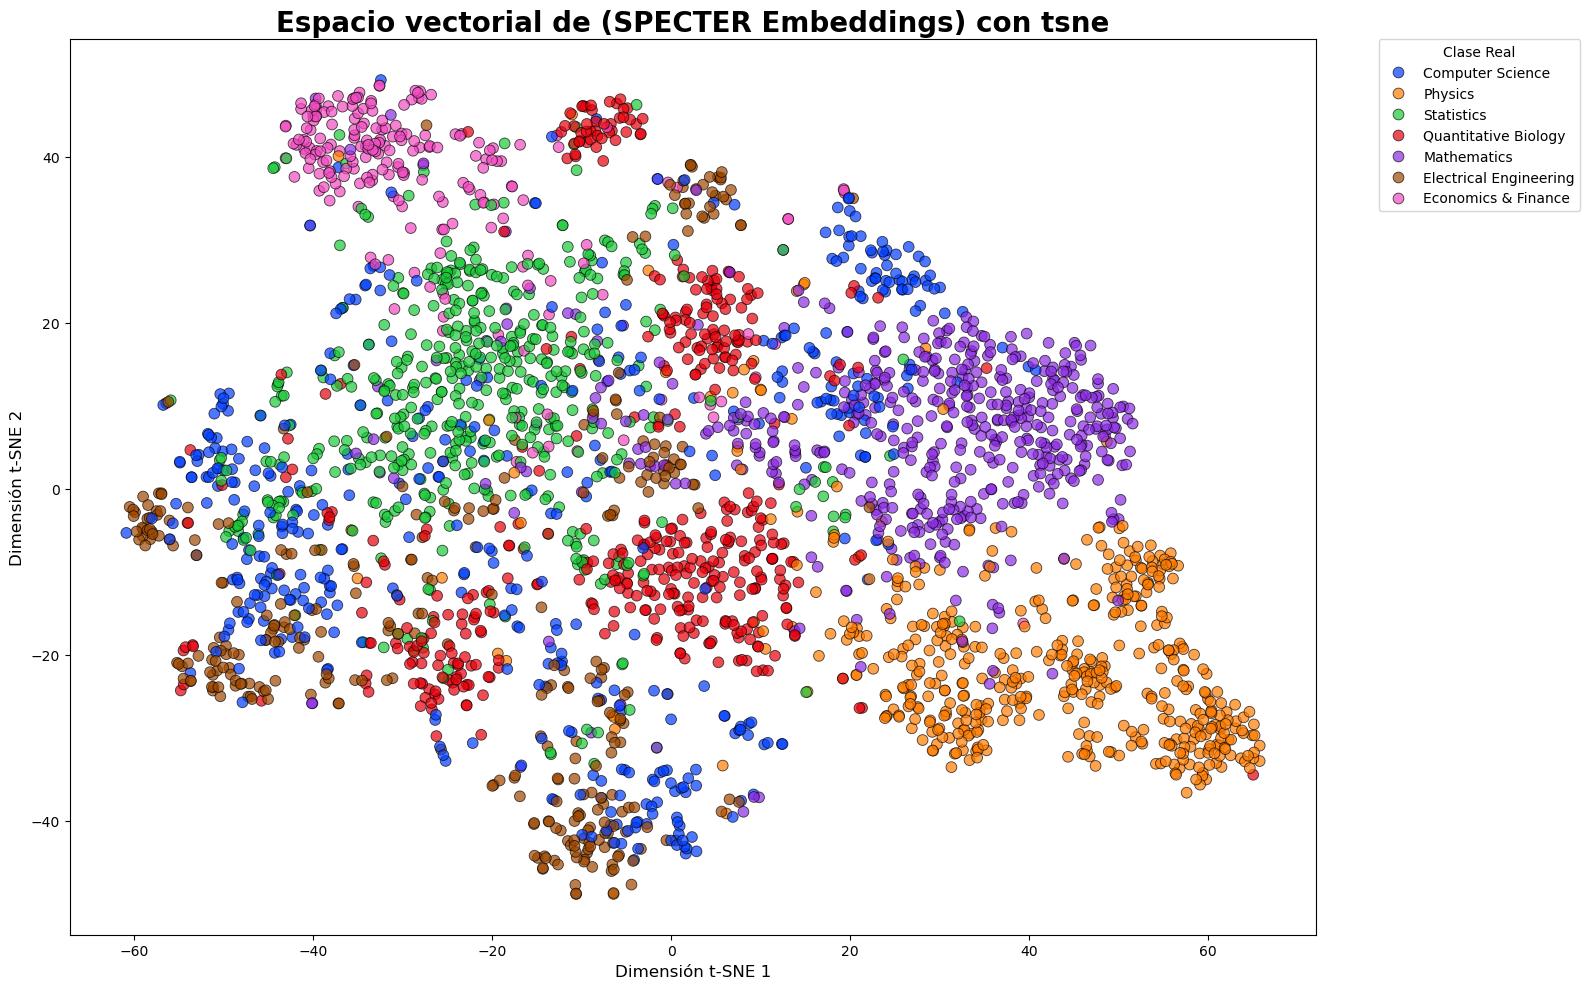

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

print(" proyección t-SNE...")
#  3000 papers random del set de prueba
n_samples = 3000
indices_random = np.random.choice(X_test.shape[0], n_samples, replace=False)

X_sample = X_test[indices_random]
y_sample = y_test[indices_random]

# calculo de tsne, reduccion de dimensionalidad para ver como se separan las clases

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, random_state=42)
z = tsne.fit_transform(X_sample)

# df a graficar
df_plot = pd.DataFrame()
df_plot["x"] = z[:, 0]
df_plot["y"] = z[:, 1]
# Convertimos los números de vuelta a nombres para la leyenda
df_plot["Categoria"] = le.inverse_transform(y_sample)

# 4. Graficar
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df_plot, 
    x="x", y="y", 
    hue="Categoria", 
    palette="bright", 
    s=60,             # tamaño de los puntos de los puntos
    alpha=0.7,        # para ver solapamientos
    edgecolor="k"     # Borde negro finito para resaltar
)

plt.title("Espacio vectorial de (SPECTER Embeddings) con tsne", fontsize=20, fontweight='bold')
plt.xlabel("Dimensión t-SNE 1", fontsize=12)
plt.ylabel("Dimensión t-SNE 2", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Clase Real")
plt.tight_layout()
plt.show()

Aqui esta la razon por la cual tenemos problemas con statistics y computer science, sus campos de estudio son demasiado abiertos a muchas aplicaciones.
estas dos clases se traslapan con las otras

para terminar este notebook, guardaremos el modelo a de mlp.
usare una libreria llamada joblib, parece que es el estandar para almacenar modelos de scikit.

In [11]:
import joblib
print(" guardando el sistema de la fase 1: MODELO A ")

#guardamos todos los parametros del mejor modelo
MODELO_A ={
    "modelo": mlp,
    "encoder": le,
    "umbral_cs": 0.30,
    "descripcion": "modelo mlp fase 1, usando embeddings specter y un umbral de rescate para computer science"
}
NOMBRE_ARCHIVO = "model_a_specter.pkl"
joblib.dump(MODELO_A, NOMBRE_ARCHIVO)

 guardando el sistema de la fase 1: MODELO A 


['model_a_specter.pkl']

In [15]:
import plotly.express as px

# Preparamos los datos: Contamos cuántos papers hay por macro y subcategoría
df_sunburst = df_label.groupby(['macro_cat', 'primary_cat']).size().reset_index(name='cantidad')

# Filtramos las muy pequeñas para que el gráfico no se vea sucio
df_sunburst = df_sunburst[df_sunburst['cantidad'] > 50] 

fig = px.sunburst(
    df_sunburst, 
    path=['macro_cat', 'primary_cat'], 
    values='cantidad',
    title='Distribución Jerárquica de arXiv (Macro -> Subcategoría)',
    color='macro_cat', # Colorear por departamento
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.show()

este grafico evidencia el desbalance natural de las disciplinas y como nuestra arquitectura jerarquica aborda la complejidad dividiendo el sistema